In [2]:
from itertools import product, combinations
import matplotlib.pyplot as plt
import numpy as np
from src import k_tree
from src.utils import data as dt
import torch
from src.k_tree import Ktree
from src.utils.data import loadData, loadData_3d
from src.metrics import Linf_simple
from src import ellipses as el

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
data = np.load('./data/ellipses/10000el_1_3.npy', allow_pickle=True)
data = np.array([data[i].ellipse.to_vector() for i in range(len(data))])


#data = rects
learning_rate = 5e-3 # 1e-2, 5e-3
k = 4
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 800, # 300
    "times": 20,
    "alpha": 0.1, #  projection loss 0.1
    "beta": 0.1, # latent loss 0.1
    "gamma": 0.011, # repulsive loss 0.01
    #"gamma": 0.4, # repulsive loss 0.01
    "delta": 0.1, # fuzzy scale 0.01
    "f_clk": 10, # 20
    "scale": 1, # fuzzy scale 
    "scale_flag": False,
    "number_of_centroids": k,
    "latent_size": 200,
    "encoder_activation": False,
    "encoder_depth": 5,
    "predictor_width": 5*100,
    "predictor_depth": 5,
}
n = 30
un_args = {
    "N": n,
    "M": n**2-1, # 10000 - 1
    "epsilon": 0.15 # here a layer value should be somehow included. As layers get denser  epilson should be smaller
}
student_args = {
    "optimizer_lr": 5e-3,
    "epochs": 3000, # 30000, 3000
    "width": 200,
    "depth": 5,
}

# thresshold = 0.1 * len(data)
threshold = k * 100
ktree = Ktree(threshold, data, el.distance_ellipse_2_point, teacher_args, un_args, student_args, device)
ktree.create_tree()






Creating student for node 0 that has 10000 data, which is more than the threshold 400.
Bounding box for node 0: [[-6317, 6320], [-6317, 6320]]
Creating teacher for node 0 with 4 centroids.
Training Teacher Model
Shuffling data
Epoch: 40/800.. 
 Training loss: 1158.56580.. 
 torch.mean(F): 1158.48352.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.08221.. 
 Repulsive: 0.00009.. 
 Memory: 115.84835.. 
 Memory: 115.84835.. 
 Output: 
 [[ 1533.4799   1017.068  ]
 [-1736.2742  -1160.5745 ]
 [ -561.1585   -392.71835]
 [  515.06696   375.15353]]
Epoch: 80/800.. 
 Training loss: 2032.80652.. 
 torch.mean(F): 2032.80371.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.00256.. 
 Repulsive: 0.00029.. 
 Memory: 203.28037.. 
 Memory: 203.28037.. 
 Output: 
 [[ 642.6667      51.23949  ]
 [-396.7317     -43.017906 ]
 [-140.18925      3.0417242]
 [ 375.6711      23.753605 ]]
Epoch: 120/800.. 
 Training loss: 1539.28992.. 
 torch.mean(F): 1539.26147.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.02833.. 
 Repulsive: 0.00007.

/home/geoten/Projects/GeoCluster/src/ellipses.py:41: RuntimeWarning: invalid value encountered in scalar divide
  ys = [(pow(b, 2) * p_y * xs[0]) / (-k * xs[0] + pow(a, 2) * p_x),
/home/geoten/Projects/GeoCluster/src/ellipses.py:42: RuntimeWarning: invalid value encountered in scalar divide
  (pow(b, 2) * p_y * xs[1]) / (-k * xs[1] + pow(a, 2) * p_x)]


Epoch: 600/800.. 
 Training loss: 832.38684.. 
 torch.mean(F): 832.27600.. 
 Reg Proj: 0.10466.. 
 Reg Latent: 0.00464.. 
 Repulsive: 0.00155.. 
 Memory: 83.22760.. 
 Memory: 83.22760.. 
 Output: 
 [[1996.538  2109.9565]
 [2062.8162 2179.5015]
 [2173.8052 2297.0483]
 [2113.2205 2232.9077]]
Epoch: 640/800.. 
 Training loss: 831.69214.. 
 torch.mean(F): 831.51562.. 
 Reg Proj: 0.17093.. 
 Reg Latent: 0.00417.. 
 Repulsive: 0.00145.. 
 Memory: 83.15156.. 
 Memory: 83.15156.. 
 Output: 
 [[2097.0154 2103.4858]
 [2160.467  2166.6714]
 [2293.6782 2300.0784]
 [2225.6123 2232.1448]]
Epoch: 680/800.. 
 Training loss: 972.35767.. 
 torch.mean(F): 972.20844.. 
 Reg Proj: 0.14382.. 
 Reg Latent: 0.00406.. 
 Repulsive: 0.00139.. 
 Memory: 97.22084.. 
 Memory: 97.22084.. 
 Output: 
 [[2241.006  2226.0405]
 [2307.3677 2293.1426]
 [2448.209  2432.6846]
 [2371.178  2356.2007]]
Epoch: 720/800.. 
 Training loss: 727.99811.. 
 torch.mean(F): 727.86517.. 
 Reg Proj: 0.12778.. 
 Reg Latent: 0.00366.. 
 Repu

In [3]:
# Report some tree stats.
leaves = ktree.get_leaves()
number_of_nodes = ktree.number_of_nodes

height = max([len(leaf.index) for leaf in leaves])
print(f"Tree height is {height}.")

leaf_sizes = [len(leaf.data) for leaf in leaves]
print(f"Created {len(leaves)} leaves with sizes")
print(leaf_sizes)
print(number_of_nodes)

Tree height is 5.
Created 50 leaves with sizes
[245, 5, 210, 231, 182, 107, 116, 92, 161, 344, 210, 275, 411, 20, 133, 93, 45, 182, 178, 50, 247, 310, 356, 321, 213, 687, 298, 309, 183, 291, 355, 169, 175, 258, 219, 251, 82, 208, 115, 261, 169, 104, 57, 110, 21, 90, 374, 237, 166, 74]
70


In [4]:
from src.utils import accuracy as acc

k = [1,2,5,10,100,500,1000]

for different_k in k:
    print(f"Current k is: {different_k}")
    print("Printing results for random queries")
    acc.random_queries(ktree, k = different_k)
    print("Printing results for serialized queries")
    acc.serialised_queries(ktree, k = different_k)

Current k is: 1
Printing results for random queries
The number of queries per layer are:
[300. 246. 154.  68.]
The percentage of correct predictions per layer is:
[82.         79.33333333 77.         74.66666667]
The number of queries per layer are:
[300. 262. 169.  83.]
The percentage of correct predictions per layer is:
[87.33333333 83.         78.66666667 78.        ]
The number of queries per layer are:
[300. 266. 162.  65.]
The percentage of correct predictions per layer is:
[88.66666667 84.66666667 80.33333333 78.66666667]
The number of queries per layer are:
[300. 264. 164.  81.]
The percentage of correct predictions per layer is:
[88.         84.         79.         76.33333333]
The mean percentage of correct predictions per layer is:
[86.5        82.75       78.75       76.91666667]
Printing results for serialized queries
The number of queries per layer are:
[484. 425. 264. 130.]
The percentage of correct predictions per layer is: 
[85.  81.  77.8 75.8]
Current k is: 2
Printin

The percentage of correct predictions per layer is: 
[72.         64.         46.33333333 35.66666667 17.          4.66666667]
The percentage of correct predictions per layer is: 
[71.66666667 61.         43.33333333 33.33333333 15.33333333  3.        ]
The percentage of correct predictions per layer is: 
[70.         62.33333333 41.         33.33333333 16.33333333  7.        ]
The percentage of correct predictions per layer is: 
[73.66666667 64.33333333 44.33333333 37.         19.          5.        ]
The mean percentage of correct predictions is: 
[71.83333333 62.91666667 43.75       34.83333333 16.91666667  4.91666667]


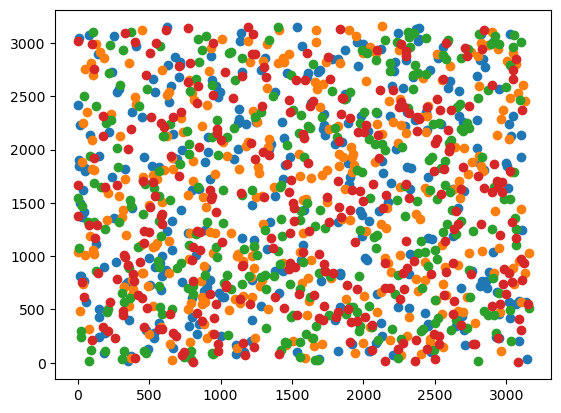

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean_acc_per_layer = np.zeros(height)
times=0

data_full = np.load('./data/ellipses/10000el_1_3.npy', allow_pickle=True)
boxes_x_min = min([data_full[i].x_min for i in range(len(data_full))])
boxes_x_max = max([data_full[i].x_max for i in range(len(data_full))])
boxes_y_min = min([data_full[i].y_min for i in range(len(data_full))])
boxes_y_max = max([data_full[i].y_max for i in range(len(data_full))])

while times < 4:
    # now lets create randomly N points in the space 0-300, 0-300
    n = 300
    random_p = torch.zeros(n, 2)
    x_lim = [boxes_x_min, boxes_x_max]
    y_lim = [boxes_y_min, boxes_y_max]


    for i in range(n):
        random_p[i] = torch.Tensor([np.random.randint(*x_lim), np.random.randint(*y_lim)])
        
    infer_points = random_p.to(device)
    plt.scatter(infer_points[:,0], infer_points[:,1])

    correct_predictions_per_layer = np.zeros(height)
    accuracy_per_layer = np.zeros(height)

    qp = infer_points
    for i, query_point in enumerate(qp):
        preds_per_layer = ktree.query_verbose(query_point)["predictions per layer"]
        brute_force = ktree.root.query(query_point)

        for j, pred in enumerate(preds_per_layer):
            if np.array_equal(pred, brute_force):
                correct_predictions_per_layer[j] += 1

    accuracy_per_layer = correct_predictions_per_layer / len(infer_points) * 100
    mean_acc_per_layer += accuracy_per_layer
    times += 1
    print(f"The percentage of correct predictions per layer is: ")
    print(accuracy_per_layer)

print(f"The mean percentage of correct predictions is: ")
print(mean_acc_per_layer/times)

The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The percentage of correct predictions per layer is: 
[72.8 63.2 42.6 34.  13.8  3.2]
The mean percentage of correct predictions is: 
[72.8 63.2 42.6 34.  13.8  3.2]


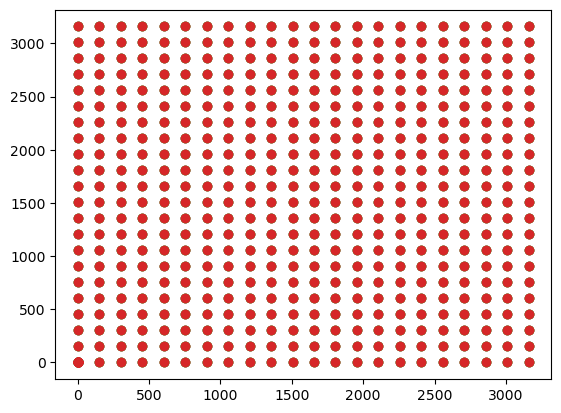

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean_acc_per_layer = np.zeros(height)
times=0

data_full = np.load('./data/ellipses/10000el_1_3.npy', allow_pickle=True)
boxes_x_min = min([data_full[i].x_min for i in range(len(data_full))])
boxes_x_max = max([data_full[i].x_max for i in range(len(data_full))])
boxes_y_min = min([data_full[i].y_min for i in range(len(data_full))])
boxes_y_max = max([data_full[i].y_max for i in range(len(data_full))])

while times < 1:
    nop =  500
    random_p = torch.zeros(nop, 2)
    x_lim = [boxes_x_min, boxes_x_max]
    y_lim = [boxes_y_min, boxes_y_max]
    num = int(np.sqrt(nop))
    for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
        for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
            random_p[i*num+j] = torch.Tensor([x, y])
    
    infer_points = random_p.to(device)
    plt.scatter(infer_points[:,0], infer_points[:,1])

    correct_predictions_per_layer = np.zeros(height)
    accuracy_per_layer = np.zeros(height)

    qp = infer_points
    for i, query_point in enumerate(qp):
        preds_per_layer = ktree.query_verbose(query_point)["predictions per layer"]
        brute_force = ktree.root.query(query_point)

        for j, pred in enumerate(preds_per_layer):
            if np.array_equal(pred, brute_force):
                correct_predictions_per_layer[j] += 1

    accuracy_per_layer = correct_predictions_per_layer / len(infer_points) * 100
    mean_acc_per_layer += accuracy_per_layer
    times += 1
    print(f"The percentage of correct predictions per layer is: ")
    print(accuracy_per_layer)

print(f"The mean percentage of correct predictions is: ")
print(mean_acc_per_layer/times)